In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm

In [19]:
def acf_garch(a,b,h):
    # h>=1
    # a: alpha
    # b: beta
    p_1 = a*(1-b*(a+b))/(1-(a+b)**2+a**2) 
    p_h = p_1 *(a+b)**(h-1)
    return p_h

In [23]:
def sim_garch(n,m,a,b,omega):
    # n: numero de series simuladas
    # m: datos de la serie a simular
    # omega : omega
    sim_mod = arch_model(None, p=1, o=0, q=1,dist="normal")
    params = {"mu":0,"omega": omega,"alpha[1]":a,"beta[1]":b}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        sim_data = sim_mod.simulate(param, m) #1000000
        datos_simulados.append(sim_data["data"])
    
    
    acfs = []
    for i in range(n):
        acfs.append(acf(np.square(datos_simulados[i]),nlags = 20))
    
    df = pd.DataFrame(acfs, columns=np.arange(0, 21))
    acf_mean = df.mean()
    acf_teory_1 = []
    acf1 = acf_mean[1:20]
    for i in range(1,20):
        acf_teory_1.append(acf_garch(a,b,i))
    
    return acf1,acf_teory_1
    

In [24]:
x = np.arange(1,20)
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = 0.1


#acf1,acft1 = sim_garch(100,100,0.3,0.2,0.1)

## n = 100 y m = 500 

In [59]:
acf_m = []
acf_t = []
n=100
m=500
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)





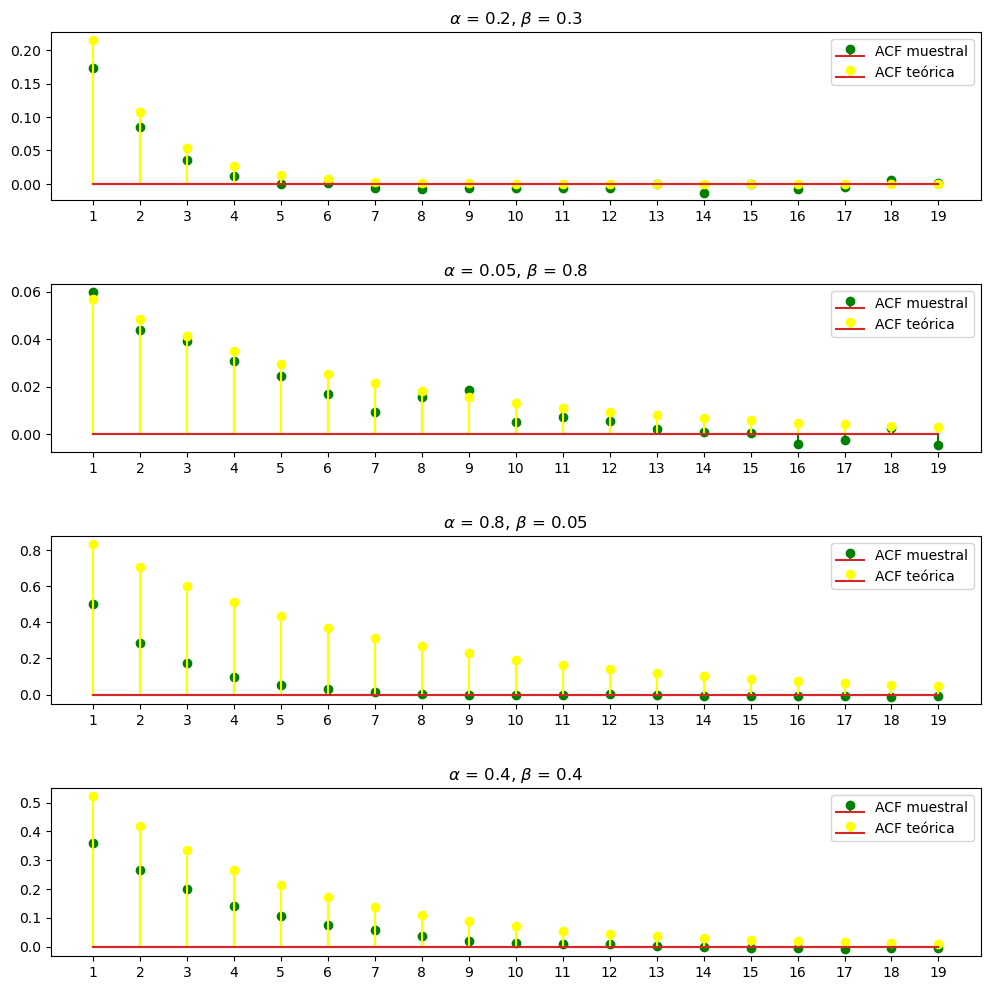

In [61]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n = 100 y m=1000

In [62]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


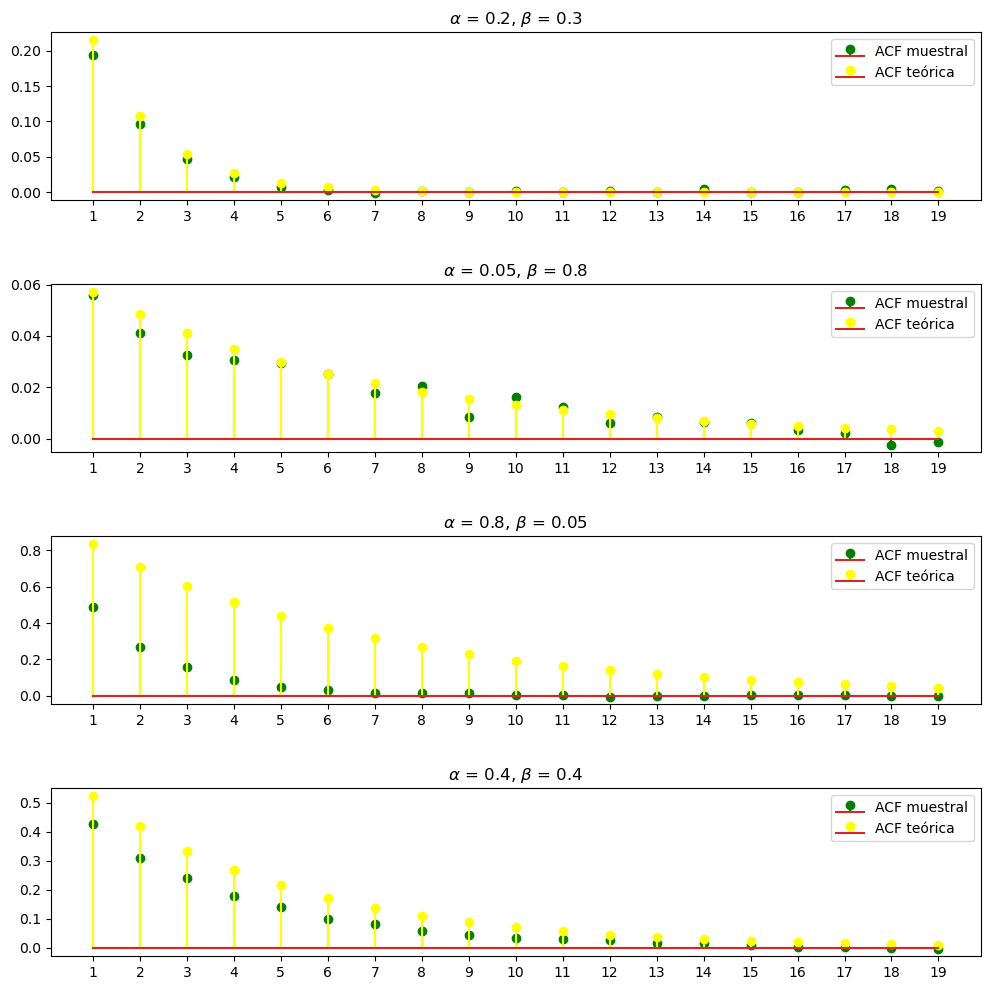

In [63]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=1000

In [54]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

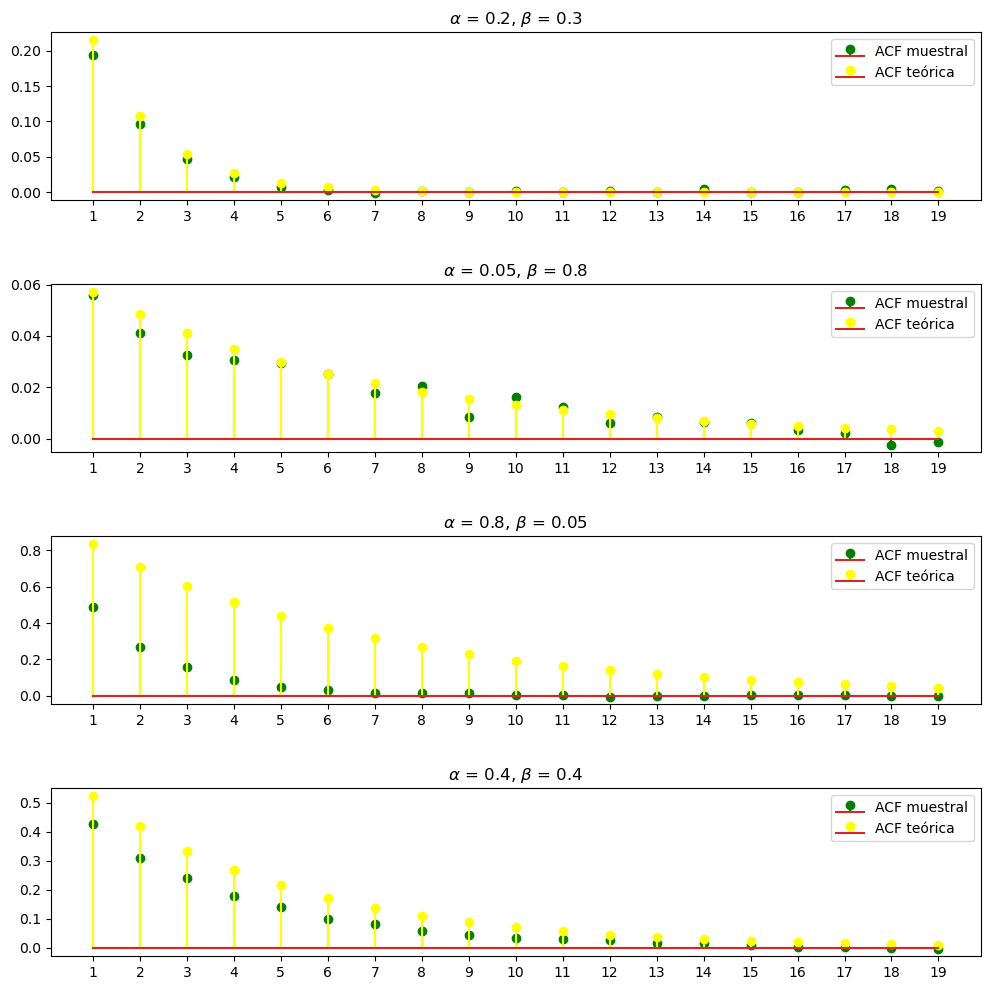

In [64]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1

## n=1000 y m=10000

In [65]:
acf_m = []
acf_t = []
n=1000
m=10000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

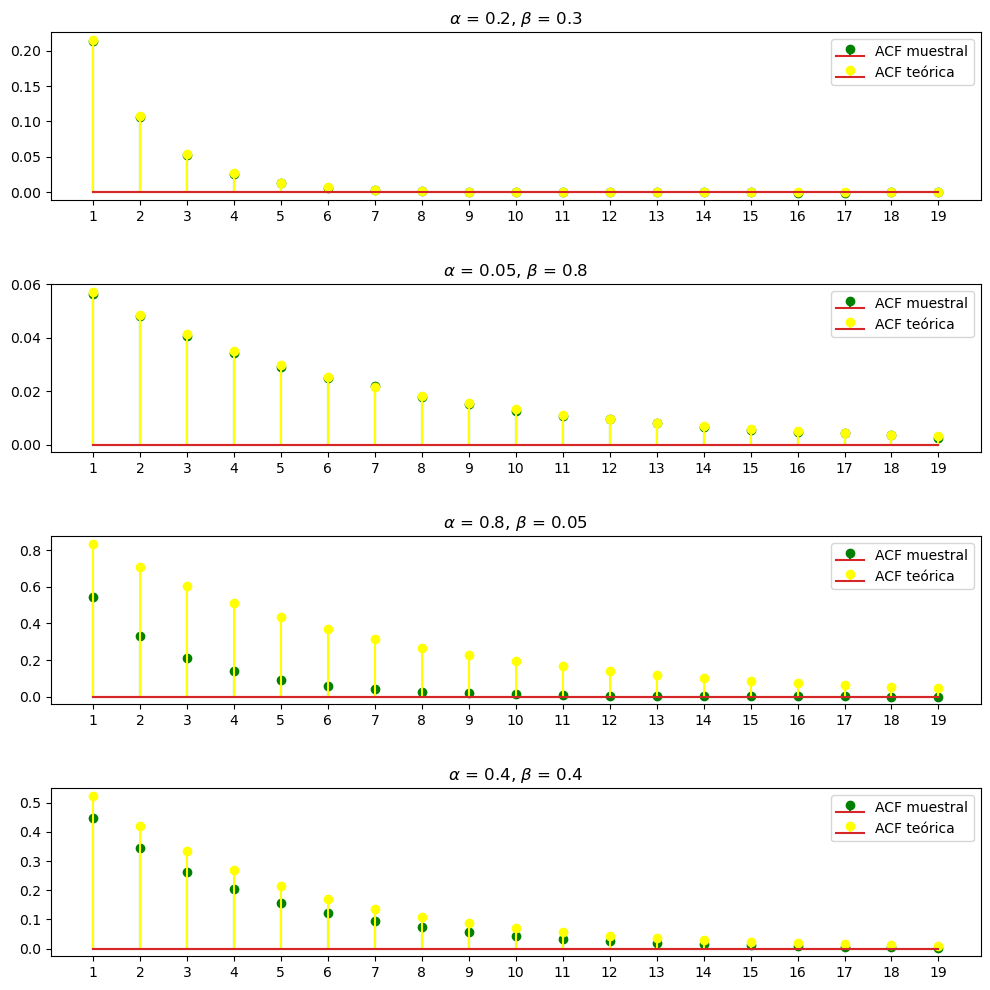

In [66]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt='green', label='ACF muestral')
    ax.stem(acf_t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[i]}, $\beta$ = {beta[i]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    i=i+1